In [1]:
#import items for cleaning

In [2]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dems_reddit=pd.read_csv('Dems Reddit 10-14-19.csv',index_col='Unnamed: 0')

In [4]:
reps_reddit=pd.read_csv('Reps Reddit 10-14-19.csv',index_col='Unnamed: 0')

In [5]:
#Change columns and add markers

In [6]:
dems_reddit.rename(columns={'Dems Titles':'titles'},inplace=True)
dems_reddit['marker']='D'
dems_reddit.head()

,titles,marker
0,Trump is now at war with polling and statistic...,D
1,"The 1,000 elite US troops in Syria are making ...",D
2,Inside Trump’s Botched Attempt to Hire Trey Go...,D
3,Can we talk about the blatant hypocrisy of Lin...,D
4,'I'm standing here in the middle of climate ch...,D


In [7]:
reps_reddit.rename(columns={'Republican Titles':'titles'},inplace=True)
reps_reddit['marker']='R'
reps_reddit.head()

,titles,marker
0,Hong Kong protestors burn Lebron Jerseys. Grea...,R
1,Sasse slams LeBron James: 'You're parroting co...,R
2,"Asked to Condemn Ilhan Omar, Dem Congressman C...",R
3,Turkish-Born Celtics Player RIPS LeBron Over C...,R
4,Ukrainian Lawmaker Says Joe Biden Took $900k f...,R


In [8]:
#check for nulls and nas

In [9]:
dems_reddit.shape

(991, 2)

In [10]:
dems_reddit.isnull().sum()

titles    0
marker    0
dtype: int64

In [11]:
dems_reddit.isna().sum()

titles    0
marker    0
dtype: int64

In [12]:
reps_reddit.shape

(476, 2)

In [13]:
reps_reddit.isnull().sum()

titles    0
marker    0
dtype: int64

In [14]:
reps_reddit.isna().sum()

titles    0
marker    0
dtype: int64

In [15]:
#merge both reddits for analysis and clean for any additional migration errors

In [16]:
politics_reddit=pd.concat([reps_reddit,dems_reddit],axis=0)

In [17]:
politics_reddit.sample(20)

,titles,marker
446,The CrowdStrike Plot: How a Fringe Theory Took...,D
396,President of Finland records a video saying he...,D
60,Never in my 12 years in the Navy did we ever p...,D
197,Rudy’s Ukraine Henchmen Arrested on Campaign F...,D
272,Joe Biden Gun-Control Plan: A Constitutional a...,R
418,Remember when republicans did this same shit t...,D
44,Sen Boxer: Note to tyrants: Just ask Trump. Wa...,D
871,‘Seismic change’: Democratic hold-outs rush to...,D
570,Former Ukraine prosecutor says he saw no evide...,D
79,Trump mocks Bernie Sanders for having a heart ...,D


In [18]:
politics_reddit.isna().sum()

titles    0
marker    0
dtype: int64

In [19]:
politics_reddit.isnull().sum()

titles    0
marker    0
dtype: int64

In [20]:
politics_reddit=politics_reddit.sample(n=politics_reddit.shape[0],replace=True)

In [21]:
politics_reddit.reset_index(inplace=True)

In [22]:
politics_reddit.drop(columns='index',inplace=True)
politics_reddit.head()

,titles,marker
0,Elizabeth Warren is Officially Leading the 202...,D
1,"Joe Biden: Trump won’t destroy me, and he won’...",D
2,"Tucker Carlson attacks the awful Shep Smith, a...",R
3,How California is using the courts to fight th...,D
4,Adam Schiff has 2 aides who worked with whistl...,R


In [23]:
politics_reddit.drop_duplicates(keep='first',inplace=True)
politics_reddit.reset_index(inplace=True)

In [24]:
politics_reddit.drop(columns='index',inplace=True)
politics_reddit.head()

,titles,marker
0,Elizabeth Warren is Officially Leading the 202...,D
1,"Joe Biden: Trump won’t destroy me, and he won’...",D
2,"Tucker Carlson attacks the awful Shep Smith, a...",R
3,How California is using the courts to fight th...,D
4,Adam Schiff has 2 aides who worked with whistl...,R


In [25]:
#Add a Vader Vectorizor to add sentiment to words

In [26]:
corpus = list(politics_reddit['titles'])
corpus[0]

'Elizabeth Warren is Officially Leading the 2020 Polls'

In [27]:
sia=SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores(corpus[4])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
all_scores=[]
for title in corpus:
    scores=sia.polarity_scores(title)
    all_scores.append(scores)
df=pd.DataFrame(all_scores)
df.tail()

,neg,neu,pos,compound
933,0.000,1.000,0.0,0.0000
934,0.000,1.000,0.0,0.0000
935,0.452,0.548,0.0,-0.5106
936,0.000,1.000,0.0,0.0000
937,0.182,0.818,0.0,-0.4404


In [30]:
politics_reddit=pd.concat([politics_reddit,df],axis=1)
politics_reddit.head()

,titles,marker,neg,neu,pos,compound
0,Elizabeth Warren is Officially Leading the 202...,D,0.000,1.000,0.0,0.0000
1,"Joe Biden: Trump won’t destroy me, and he won’...",D,0.196,0.804,0.0,-0.8750
2,"Tucker Carlson attacks the awful Shep Smith, a...",R,0.312,0.688,0.0,-0.7096
3,How California is using the courts to fight th...,D,0.181,0.819,0.0,-0.4939
4,Adam Schiff has 2 aides who worked with whistl...,R,0.000,1.000,0.0,0.0000


In [31]:
politics_reddit['title_length']=politics_reddit['titles'].map(len)
politics_reddit.head()

,titles,marker,neg,neu,pos,compound,title_length
0,Elizabeth Warren is Officially Leading the 202...,D,0.000,1.000,0.0,0.0000,53
1,"Joe Biden: Trump won’t destroy me, and he won’...",D,0.196,0.804,0.0,-0.8750,261
2,"Tucker Carlson attacks the awful Shep Smith, a...",R,0.312,0.688,0.0,-0.7096,104
3,How California is using the courts to fight th...,D,0.181,0.819,0.0,-0.4939,144
4,Adam Schiff has 2 aides who worked with whistl...,R,0.000,1.000,0.0,0.0000,68


In [32]:
#EDA for the sentiments

In [33]:
politics_reddit.groupby('marker').mean()

,neg,neu,pos,compound,title_length
marker,,,,,
D,0.096950,0.832441,0.070603,-0.086123,131.858974
R,0.124376,0.802640,0.072968,-0.100977,79.410828


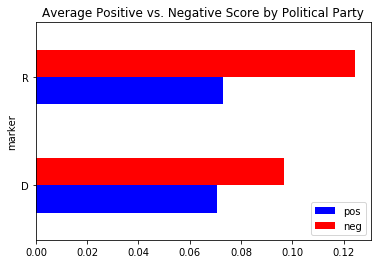

In [92]:
politics_reddit.groupby('marker').mean()[['pos', 'neg']].plot(kind='barh',color=['b','r'])
plt.title('Average Positive vs. Negative Score by Political Party');

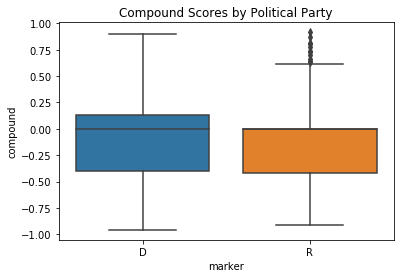

In [98]:
sns.boxplot(x='marker',y='compound',data=politics_reddit);
plt.title('Compound Scores by Political Party');

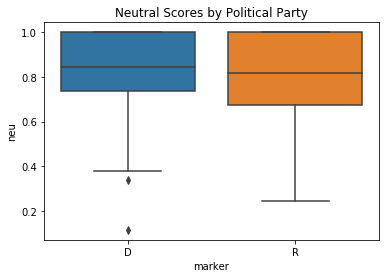

In [36]:
sns.boxplot(x='marker',y='neu',data=politics_reddit);
plt.title('Neutral Scores by Political Party');

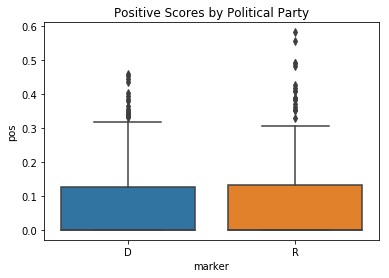

In [37]:
sns.boxplot(x='marker',y='pos',data=politics_reddit);
plt.title('Positive Scores by Political Party');

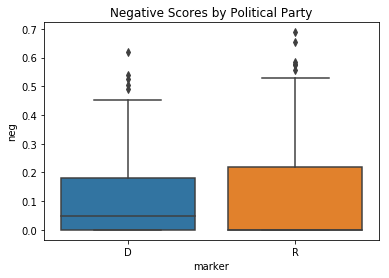

In [38]:
sns.boxplot(x='marker',y='neg',data=politics_reddit);
plt.title('Negative Scores by Political Party');

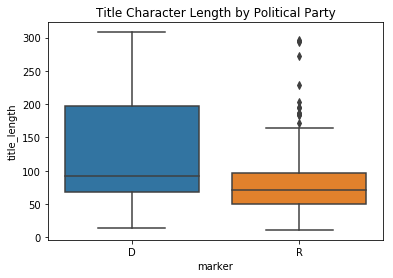

In [39]:
sns.boxplot(x='marker',y='title_length',data=politics_reddit);
plt.title('Title Character Length by Political Party');

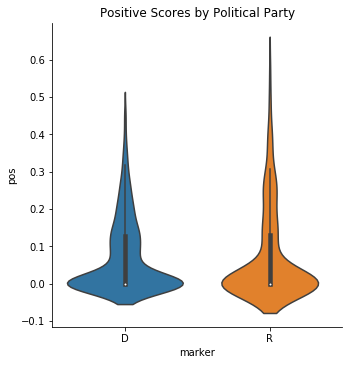

In [40]:
sns.catplot(x='marker',y='pos',data=politics_reddit,kind='violin');
plt.title('Positive Scores by Political Party');

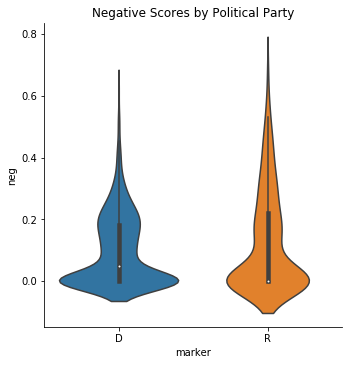

In [41]:
sns.catplot(x='marker',y='neg',data=politics_reddit,kind='violin');
plt.title('Negative Scores by Political Party');

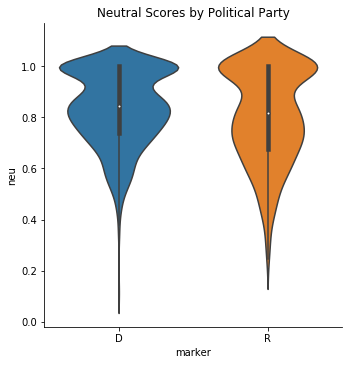

In [42]:
sns.catplot(x='marker',y='neu',data=politics_reddit,kind='violin');
plt.title('Neutral Scores by Political Party');

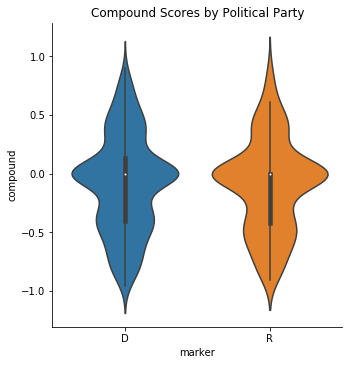

In [43]:
sns.catplot(x='marker',y='compound',data=politics_reddit,kind='violin');
plt.title('Compound Scores by Political Party');

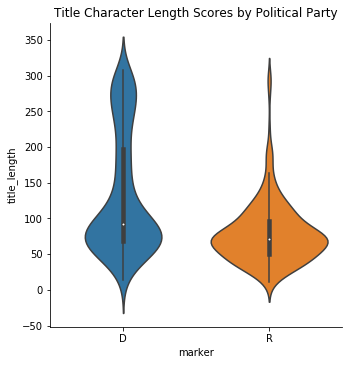

In [90]:
sns.catplot(x='marker',y='title_length',data=politics_reddit,kind='violin');
plt.title('Title Character Length Scores by Political Party');

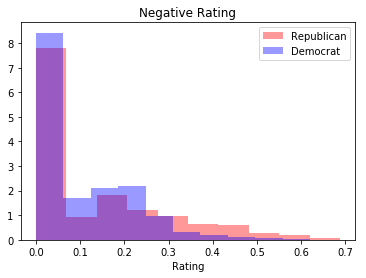

In [85]:
plt.hist(politics_reddit[politics_reddit['marker']=='R']['neg'], alpha=0.4, density=True, color='r'),
plt.hist(politics_reddit[politics_reddit['marker']=='D']['neg'], alpha=0.4, density=True, color='b');
plt.title('Negative Rating')
plt.xlabel('Rating'),
plt.legend(['Republican','Democrat']);

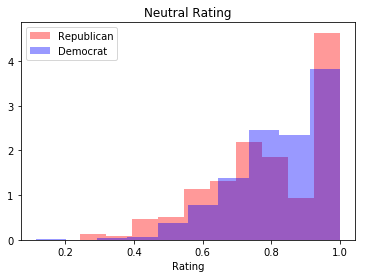

In [84]:
plt.hist(politics_reddit[politics_reddit['marker']=='R']['neu'], alpha=0.4, density=True, color='r')
plt.hist(politics_reddit[politics_reddit['marker']=='D']['neu'], alpha=0.4, density=True, color='b');
plt.title('Neutral Rating')
plt.xlabel('Rating')
plt.legend(['Republican','Democrat']);

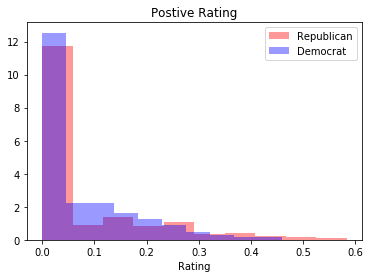

In [83]:
plt.hist(politics_reddit[politics_reddit['marker']=='R']['pos'], alpha=0.4, density=True, color='r')
plt.hist(politics_reddit[politics_reddit['marker']=='D']['pos'], alpha=0.4, density=True, color='b');
plt.title('Postive Rating')
plt.xlabel('Rating')
plt.legend(['Republican','Democrat']);

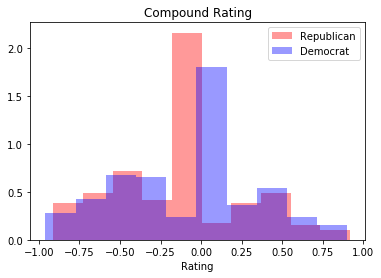

In [81]:
plt.hist(politics_reddit[politics_reddit['marker']=='R']['compound'], alpha=0.4, density=True, color='r')
plt.hist(politics_reddit[politics_reddit['marker']=='D']['compound'], alpha=0.4, density=True, color='b')
plt.title('Compound Rating')
plt.xlabel('Rating')
plt.legend(['Republican','Democrat']);

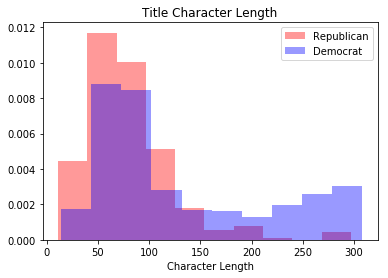

In [82]:
plt.hist(politics_reddit[politics_reddit['marker']=='R']['title_length'], alpha=0.4, density=True, color='r')
plt.hist(politics_reddit[politics_reddit['marker']=='D']['title_length'], alpha=0.4, density=True, color='b');
plt.title('Title Character Length')
plt.xlabel('Character Length')
plt.legend(['Republican','Democrat']);

In [50]:
politics_reddit.sort_values(by='neg',ascending=False).head(10)

,titles,marker,neg,neu,pos,compound,title_length
800,Democrats killing Connecticut,R,0.688,0.312,0.000,-0.6597,29
396,Nixon: Victim of a Media Riot,R,0.655,0.345,0.000,-0.6908,29
736,Hillary Clinton: This sickening horror is one ...,D,0.620,0.380,0.000,-0.8689,58
166,China’s Intimidation Campaign,R,0.583,0.417,0.000,-0.4215,29
784,Liberals Clarify Their Racism Is Actually Demo...,R,0.577,0.423,0.000,-0.8481,59
600,EXCLUSIVE: Illegal immigrant accused of gang m...,R,0.573,0.324,0.103,-0.8798,93
869,"For Trump Haters, This Has To Be The Worst Rec...",R,0.558,0.442,0.000,-0.8779,57
416,Kill with Kindness,D,0.540,0.115,0.345,-0.4019,18
911,The Saudi's can fight and pay for their own war,R,0.530,0.470,0.000,-0.7845,47
209,"Democrats denounce Trump's trade policies, but...",D,0.524,0.476,0.000,-0.7715,71


In [51]:
politics_reddit.sort_values(by='pos',ascending=False).head(10)

,titles,marker,neg,neu,pos,compound,title_length
586,California’s Labor of Love,R,0.000,0.417,0.583,0.6369,26
675,Ready for Hilary?,R,0.000,0.444,0.556,0.3612,17
306,Silicon Valley’s Useful Idiots,R,0.000,0.508,0.492,0.4404,30
617,The Temptation of Intelligence Politicization ...,R,0.000,0.508,0.492,0.7003,66
56,Trump is Winning the Great Game of American Po...,R,0.000,0.516,0.484,0.8176,62
740,Here’s why Democrats are winning,D,0.000,0.541,0.459,0.5267,32
202,"Trump, the stable genius!",D,0.000,0.546,0.454,0.3595,25
466,"Russia’s having a pretty good October, thanks ...",D,0.109,0.446,0.446,0.7783,78
813,"Need help learning about democratic values, id...",D,0.000,0.565,0.435,0.6597,60
47,Do not anger Mark Levin,R,0.000,0.572,0.428,0.4585,23


In [52]:
politics_reddit.sort_values(by='neu',ascending=False).head(10)

,titles,marker,neg,neu,pos,compound,title_length
0,Elizabeth Warren is Officially Leading the 202...,D,0.0,1.0,0.0,0.0,53
283,Groundhog’ Dems again ‘left’ behind,R,0.0,1.0,0.0,0.0,35
690,Biden:Refuse Snowden assylum or face consequen...,R,0.0,1.0,0.0,0.0,50
299,Fox’s Chris Wallace: Ukraine Envoy’s Statement...,D,0.0,1.0,0.0,0.0,95
692,U.S.–Israel Alliance: America Cannot Sacrifice...,R,0.0,1.0,0.0,0.0,71
294,Justin Trudeau: Identity-Politics Hypocrite,R,0.0,1.0,0.0,0.0,43
693,House Barrels Toward Impeachment Decisions as ...,D,0.0,1.0,0.0,0.0,76
696,New IBD/TIPP matchup poll: National General El...,D,0.0,1.0,0.0,0.0,166
288,Where can I watch Tuesday's debate?,D,0.0,1.0,0.0,0.0,35
287,Warren announces $10 million-plus ad buy in ea...,D,0.0,1.0,0.0,0.0,56


In [53]:
politics_reddit.sort_values(by='compound',ascending=False).head(10)

,titles,marker,neg,neu,pos,compound,title_length
906,Touching moment Donald Trump hugs wounded Afgh...,R,0.000,0.590,0.410,0.9169,155
76,John Delaney: It is wrong to think that the wa...,D,0.090,0.606,0.304,0.9022,290
812,Bernie Sanders on Twitter- It's National Voter...,D,0.000,0.735,0.265,0.8801,245
742,This Is Absolutely AMAZING !!!... Watch As Thi...,R,0.000,0.749,0.251,0.8760,171
200,Joe Biden on Twitter: Dr. Jill Biden and I are...,D,0.000,0.845,0.155,0.8402,293
327,Hillary Clinton: The president of the United S...,D,0.133,0.558,0.308,0.8274,249
56,Trump is Winning the Great Game of American Po...,R,0.000,0.516,0.484,0.8176,62
519,House Freedom Caucus Chair introduces motion t...,R,0.000,0.767,0.233,0.8074,186
57,"Rick Wilson: ""You're about to find out."" -- Do...",D,0.035,0.808,0.156,0.8016,308
777,How Democrats can build support for impeachmen...,D,0.000,0.704,0.296,0.7906,141


In [54]:
politics_reddit.sort_values(by='title_length',ascending=False).head(10)

,titles,marker,neg,neu,pos,compound,title_length
57,"Rick Wilson: ""You're about to find out."" -- Do...",D,0.035,0.808,0.156,0.8016,308
720,"Mimi Rocah on Twitter: ""If US has legit need t...",D,0.000,0.918,0.082,0.4939,303
787,Joe Biden on Twitter: President Trump betrayed...,D,0.213,0.637,0.150,-0.7184,301
46,Trump Attacks Whistle-Blower’s Sources and All...,D,0.152,0.848,0.000,-0.7579,300
840,Trump allies pressed Ukraine over gas firm: Th...,D,0.025,0.938,0.037,0.1531,300
167,"Rick Wilson: ""Start thinking about the fact th...",D,0.000,0.952,0.048,0.3612,300
691,Trump Urged Top Aide to Help Giuliani Client F...,D,0.206,0.613,0.181,-0.1280,300
930,Former Ukraine prosecutor says he saw no evide...,D,0.088,0.876,0.036,-0.3818,300
512,Trump’s decision on Syria crystallizes questio...,D,0.047,0.842,0.111,0.4767,300
508,Macabre Video of Fake Trump Shooting Media and...,D,0.277,0.671,0.051,-0.9153,300


In [55]:
politics_reddit.to_csv('politics_reddit.csv')